# Read FTIR data

Read the data and the Read-FTIR-Data notebook from: 

https://hep.ph.liv.ac.uk/~green/Phys498-MPhysProj-2022/

Then have a play with the datacube!

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Store name of current working directory then move to directory containing data.

In [8]:
cwd = %pwd
print(" ")
print("cwd",cwd)
print(" ")
%cd C:/Users/green/OneDrive - The University of Liverpool/Phys498-2022-FTIR-Data
%ls 

 
cwd C:\Users\green\OneDrive - The University of Liverpool\Phys498-2022-FTIR-Data
 
C:\Users\green\OneDrive - The University of Liverpool\Phys498-2022-FTIR-Data
 Volume in drive C is OS
 Volume Serial Number is 4E29-A68D

 Directory of C:\Users\green\OneDrive - The University of Liverpool\Phys498-2022-FTIR-Data

24/10/2022  19:41    <DIR>          .
26/10/2022  08:51    <DIR>          ..
27/07/2021  13:37        75,005,184 A12.tif
20/07/2021  11:07             1,985 A12_Annotation.png
20/07/2021  11:07       394,788,992 A12_FTIR.npy
24/10/2022  15:38            14,754 Data details -James.docx
24/10/2022  15:28         4,623,677 Fundamental developments in infrared.pdf
27/07/2021  13:39        75,005,184 G13.tif
20/07/2021  13:23             1,223 G13_Annotation.png
20/07/2021  13:23       394,788,992 G13_FTIR.npy
24/10/2022  14:48            21,963 IR in OSCC prognosis primer - Janet.docx
24/10/2022  14:53             6,104 wavenumbers.npy
              10 File(s)    944,258,058 bytes

Load the wavenumbers (common to both datacubes) and the A12 data.

In [9]:
wavenumbers = np.load("wavenumbers.npy")[0]
A12_FTIR = np.load("A12_FTIR.npy")
print("A12_FTIR.shape",A12_FTIR.shape)
print("wavenumbers.shape",wavenumbers.shape)
k_plot = 534
print(f"wavenumbers[{k_plot:d}] = {wavenumbers[k_plot]:f}.")

A12_FTIR.shape (256, 256, 753)
wavenumbers.shape (753,)
wavenumbers[534] = 2958.253254.


Plot a number of A12 spectra.

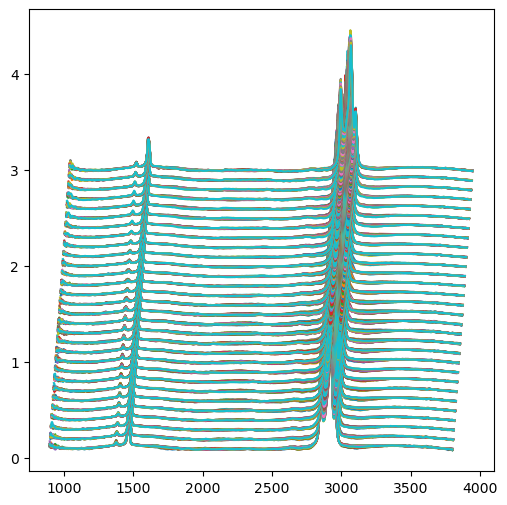

In [10]:
plt.figure(figsize = (6, 6))
max_row = 30
max_col = 30
n_rows = min(A12_FTIR.shape[0], max_row)
n_cols = min(A12_FTIR.shape[1], max_col)
for row in range(0, n_rows):
    for col in range(0, n_cols):
        plt.plot(wavenumbers + 5*row, A12_FTIR[row, col, :] + 0.1*row)
    #
plt.show()

Plot the datacube as an image (using the signal at particular wavenumber to choose the colour).

k_plot 500 wavenumber 2827.1181685924535


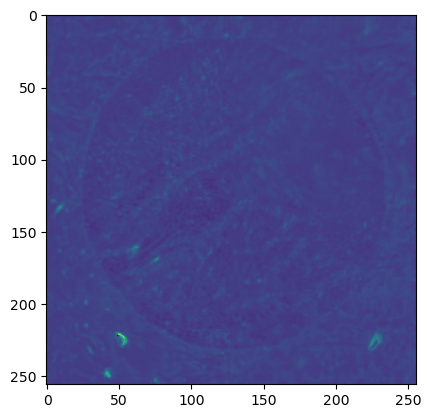

In [11]:
k_plot = 500
print("k_plot",k_plot,"wavenumber",wavenumbers[k_plot])
imgplot = plt.imshow(A12_FTIR[:, :, k_plot], cmap = 'viridis')

Look at the A12 H&E image.

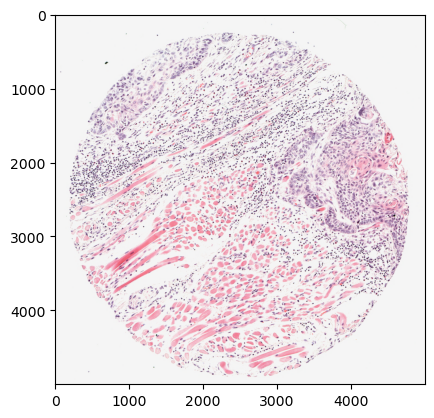

In [12]:
from PIL import Image
A12_pic = Image.open('A12.tif')
A12_array = np.array(A12_pic)
plt.imshow(A12_array);

Look at the A12 mask

(256, 256)
6208


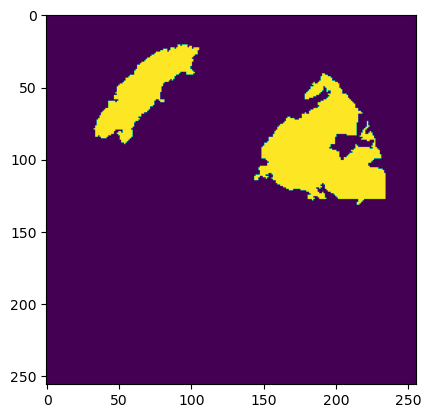

In [13]:
A12_ann = Image.open('A12_annotation.png')
A12_mask = (np.sum(np.array(A12_ann), axis = 2) > 255).astype(bool)
print(A12_mask.shape)
print(np.sum(A12_mask))
plt.imshow(A12_mask);

Load the G13 datacube.

In [14]:
G13_FTIR = np.load("G13_FTIR.npy")
print("G13_FTIR.shape",G13_FTIR.shape)

G13_FTIR.shape (256, 256, 753)


Look at some spectra.

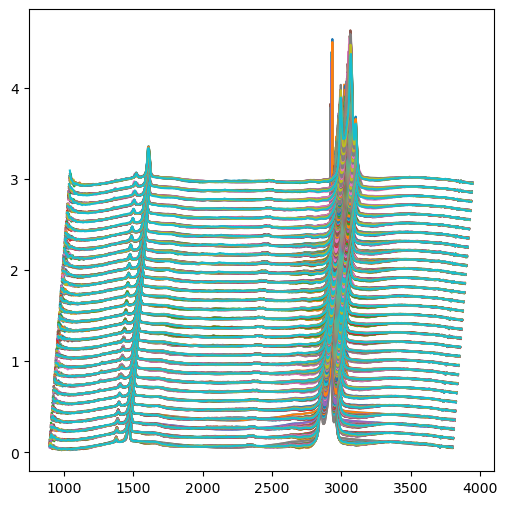

In [15]:
plt.figure(figsize = (6, 6))
max_row = 30
max_col = 30
n_rows = min(G13_FTIR.shape[0], max_row)
n_cols = min(G13_FTIR.shape[1], max_col)
for row in range(0, n_rows):
    for col in range(0, n_cols):
        plt.plot(wavenumbers + 5*row, G13_FTIR[row, col, :] + 0.1*row)
    #
plt.show()

Plot the datacube as an image (using the signal at particular wavenumber to choose the colour).

k_plot 534 wavenumber 2958.2532541751866


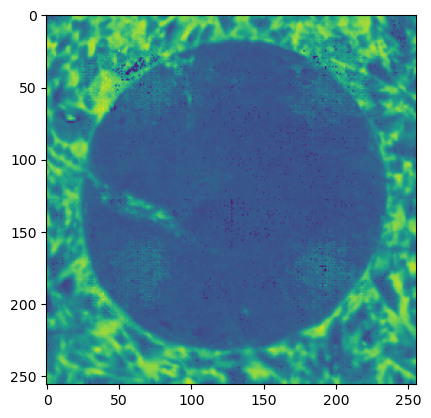

In [16]:
k_plot = 534
print("k_plot",k_plot,"wavenumber",wavenumbers[k_plot])
imgplot = plt.imshow(G13_FTIR[:, :, k_plot], cmap = 'viridis')

Look at the G13 H&E image.

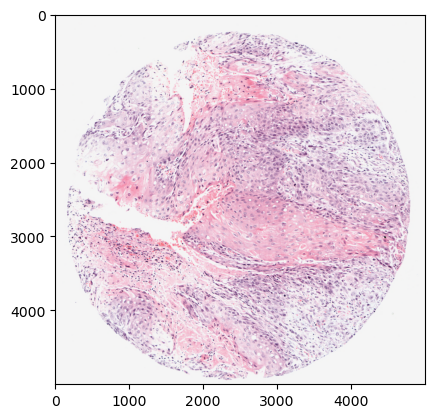

In [17]:
G13_pic = Image.open('G13.tif')
G13_array= np.array(G13_pic)
plt.imshow(G13_array);

Look at the G13 mask.

(256, 256)
3991


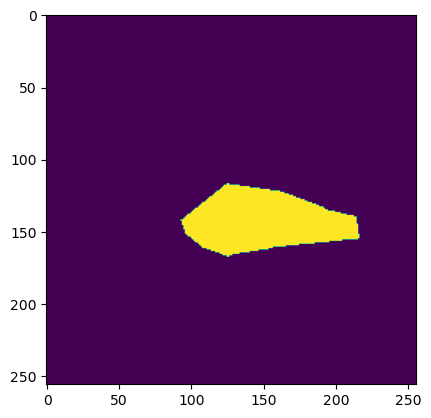

In [18]:
G13_ann = Image.open('G13_annotation.png')
G13_mask = (np.sum(np.array(G13_ann), axis = 2) > 255).astype(bool)
print(G13_mask.shape)
print(np.sum(G13_mask))
plt.imshow(G13_mask);

Change back to the intial working directory.

In [19]:
%cd {cwd}

C:\Users\green\OneDrive - The University of Liverpool\Phys498-2022-FTIR-Data


## Expand and contract the mask

In [20]:
def expander(picture, edgeWidth, useDiag = True):
    '''
    Return array containing thresholded regions expanded by band of width edgeWidth. The flag useDiag ensures
    "corner" pixels are included correctly.
    '''
    #
    shiftR = 1
    shiftC = 1
    nRows, nCols = picture.shape
    edges = np.full((nRows, nCols), False)
    edgeSum = np.full((nRows, nCols), False)
    imgShift = np.full((nRows, nCols), False)
    #
    for  nE in range(0, edgeWidth):
        #
        # Left edge
        imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
        imgShift[0:nRows, nCols - shiftC:nCols] = False
        edges = np.logical_and(np.logical_not(picture), imgShift)
        #
        # Right edge 
        imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
        imgShift[0:nRows, 0:shiftC] = False
        edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        # Upper edge 
        imgShift[shiftR:nRows, 0:nCols] = picture[0:nRows - shiftR, 0:nCols]
        imgShift[0:shiftR, 0:nCols] = False    
        edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        # Lower edge 
        imgShift[0:nRows - shiftR, 0:nCols] = picture[shiftR:nRows, 0:nCols]    
        imgShift[nRows - shiftR:nRows, 0:nCols] = False
        edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        if useDiag:
            #
            # Left upper edge
            imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
            imgShift[0:nRows, nCols - shiftC:nCols] = False
            imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
            imgShift[0:shiftR, 0:nCols] = False    
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
            #
            # Left lower edge
            imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
            imgShift[0:nRows, nCols - shiftC:nCols] = False
            imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
            imgShift[nRows - shiftR:nRows, 0:nCols] = False
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
            #
            # Right upper edge 
            imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
            imgShift[0:nRows, 0:shiftC] = False
            imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
            imgShift[0:shiftR, 0:nCols] = False    
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
            #
            # Right lower edge 
            imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
            imgShift[0:nRows, 0:shiftC] = False
            imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
            imgShift[nRows - shiftR:nRows, 0:nCols] = False
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        picture = np.logical_or(picture, edges)
        edgeSum = np.logical_or(edges, edgeSum)
    #
    return picture, edgeSum
#
#
#
def contracter(picture, edgeWidth, useDiag = True):
    '''
    Return array containing thresholded regions contracted by band of width edgeWidth. The flag useDiag ensures
    "corner" pixels are included correctly.
    '''
    #
    shiftR = 1
    shiftC = 1
    nRows, nCols = picture.shape
    edges = np.full((nRows, nCols), False)
    edgeSum = np.full((nRows, nCols), False)
    imgShift = np.full((nRows, nCols), False)
    #
    for nE in range(0, edgeWidth):
        #
        # Left edge
        imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
        imgShift[0:nRows, nCols - shiftC:nCols] = False
        edges = np.logical_and(np.logical_not(imgShift), picture)
        #
        # Right edge 
        imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
        imgShift[0:nRows, 0:shiftC] = False
        edges = np.logical_or(edges, np.logical_and(np.logical_not(imgShift), picture))
        #
        # Upper edge 
        imgShift[shiftR:nRows, 0:nCols] = picture[0:nRows - shiftR, 0:nCols]
        imgShift[0:shiftR, 0:nCols] = False    
        edges = np.logical_or(edges, np.logical_and(np.logical_not(imgShift), picture))
        #
        # Lower edge 
        imgShift[0:nRows - shiftR, 0:nCols] = picture[shiftR:nRows, 0:nCols]    
        imgShift[nRows - shiftR:nRows, 0:nCols] = False
        edges = np.logical_or(edges, np.logical_and(np.logical_not(imgShift), picture))
        #
        if useDiag:
            #
            # Left upper edge
            imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
            imgShift[0:nRows, nCols - shiftC:nCols] = False
            imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
            imgShift[0:shiftR, 0:nCols] = False    
            edges = np.logical_or(edges, np.logical_and(np.logical_not(imgShift), picture))
            #
            # Left lower edge
            imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
            imgShift[0:nRows, nCols - shiftC:nCols] = False
            imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
            imgShift[nRows - shiftR:nRows, 0:nCols] = False
            edges = np.logical_or(edges, np.logical_and(np.logical_not(imgShift), picture))
            #
            # Right upper edge 
            imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
            imgShift[0:nRows, 0:shiftC] = False
            imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
            imgShift[0:shiftR, 0:nCols] = False    
            edges = np.logical_or(edges, np.logical_and(np.logical_not(imgShift), picture))
            #
            # Right lower edge 
            imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
            imgShift[0:nRows, 0:shiftC] = False
            imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
            imgShift[nRows - shiftR:nRows, 0:nCols] = False
            edges = np.logical_or(edges, np.logical_and(np.logical_not(imgShift), picture))
    #
        picture = np.logical_and(picture, np.logical_not(edges))
        edgeSum = np.logical_or(edges, edgeSum)
    #
    return picture, edgeSum

Test the expansion

A12 size 6208
A12 expansion 4222
A12 expanded size 10430


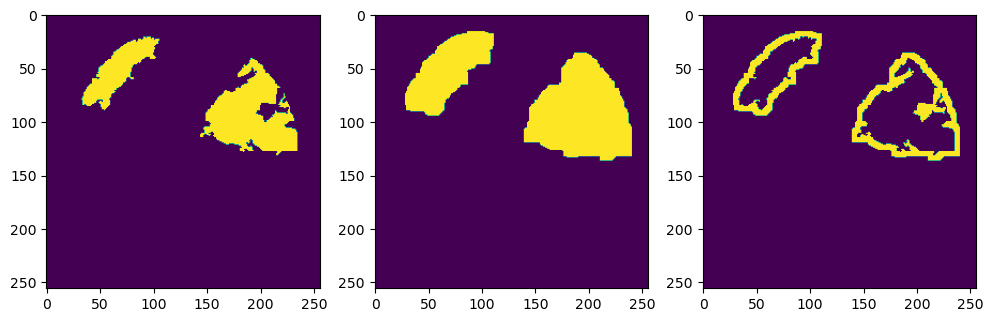

G13 size 3991
G13 expansion 1850
G13 expanded size 5841


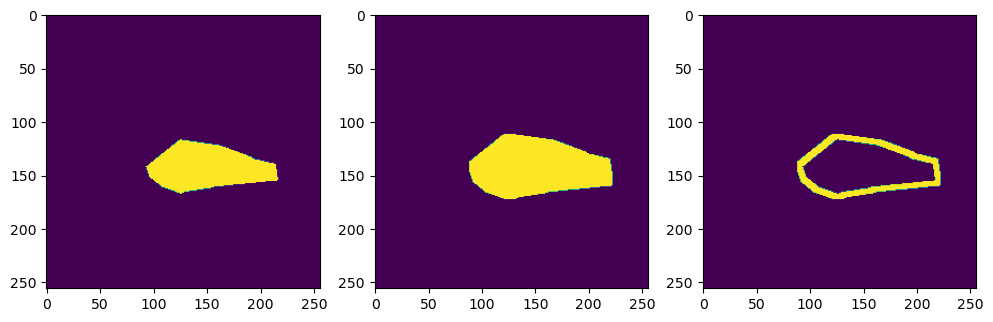

In [21]:
print("A12 size",np.sum(A12_mask))
A12_mask_exp, expansion = expander(A12_mask, 5)
print("A12 expansion",np.sum(expansion))
print("A12 expanded size",np.sum(A12_mask_exp))
fig, ax = plt.subplots(1, 3, figsize = (12, 5))
ax[0].imshow(A12_mask)
ax[1].imshow(A12_mask_exp)
ax[2].imshow(expansion)
plt.show()
#
print("G13 size",np.sum(G13_mask))
G13_mask_exp, expansion = expander(G13_mask, 5)
print("G13 expansion",np.sum(expansion))
print("G13 expanded size",np.sum(G13_mask_exp))
fig, ax = plt.subplots(1, 3, figsize = (12, 5))
ax[0].imshow(G13_mask)
ax[1].imshow(G13_mask_exp)
ax[2].imshow(expansion)
plt.show()

Test the contraction

A12 size 6208
A12 contraction 3703
A12 contracted size 2505


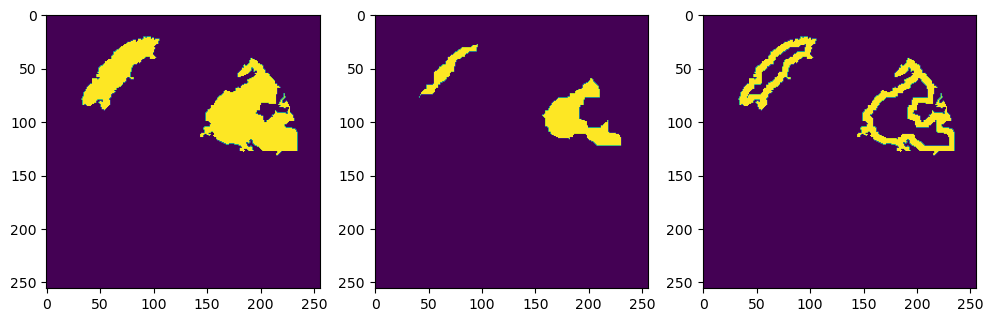

G13 size 3991
G13 contraction 1607
G13 contracted size 2384


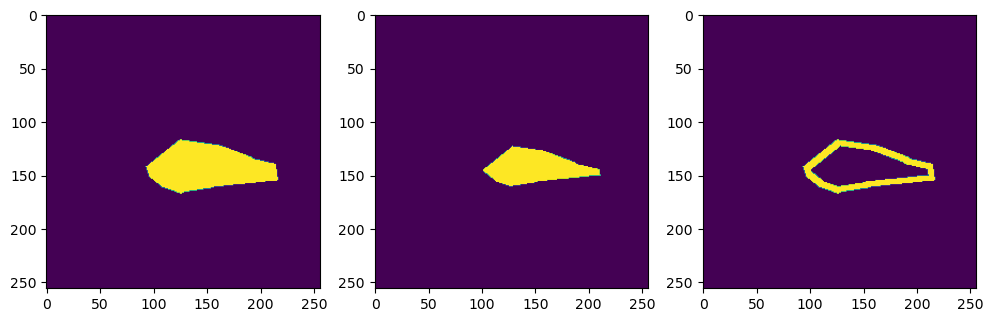

In [22]:
print("A12 size",np.sum(A12_mask))
A12_mask_con, contraction = contracter(A12_mask, 5)
print("A12 contraction",np.sum(contraction))
print("A12 contracted size",np.sum(A12_mask_con))
fig, ax = plt.subplots(1, 3, figsize = (12, 5))
ax[0].imshow(A12_mask)
ax[1].imshow(A12_mask_con)
ax[2].imshow(contraction)
plt.show()
#
print("G13 size",np.sum(G13_mask))
G13_mask_con, contraction = contracter(G13_mask, 5)
print("G13 contraction",np.sum(contraction))
print("G13 contracted size",np.sum(G13_mask_con))
fig, ax = plt.subplots(1, 3, figsize = (12, 5))
ax[0].imshow(G13_mask)
ax[1].imshow(G13_mask_con)
ax[2].imshow(contraction)
plt.show()

## Apply masks to data

Look at masked image A12.

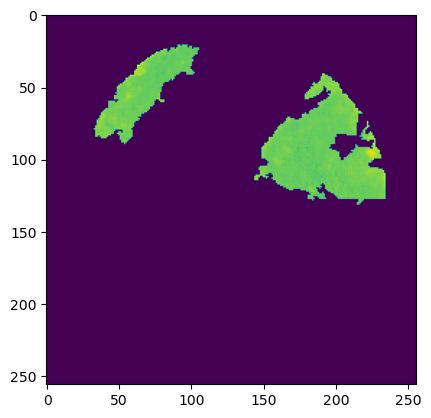

In [23]:
k_plot = 534
imgplot = plt.imshow(A12_FTIR[:, :, k_plot]*A12_mask, cmap = 'viridis')

Look at masked image G13.

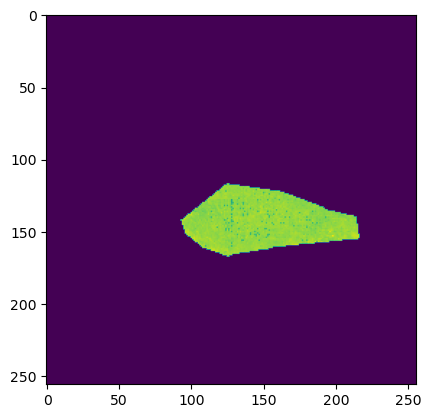

In [24]:
imgplot = plt.imshow(G13_FTIR[:, :, k_plot]*G13_mask, cmap = 'viridis')

Look at masked and unmasked spectra G13.

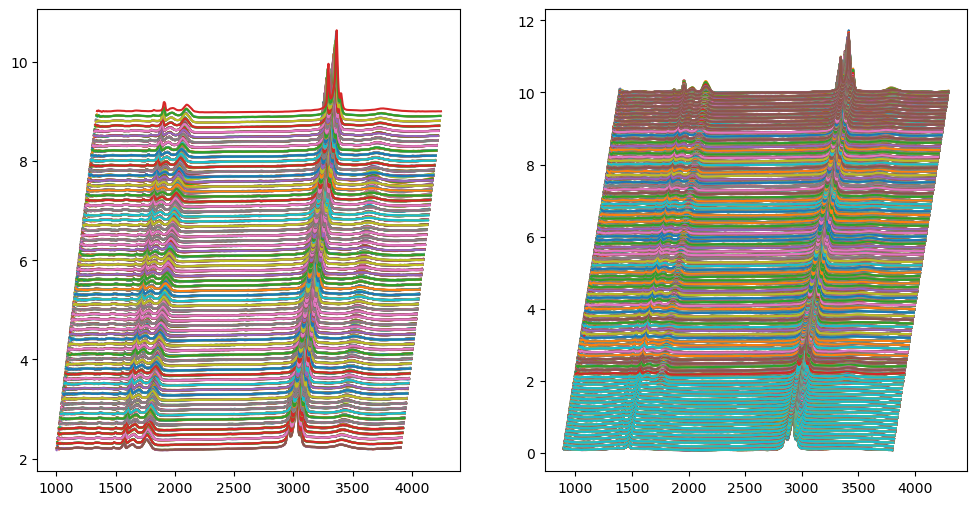

In [25]:
min_row, max_row = 0, 100
min_col, max_col = 0, 100
n_rows = min(A12_FTIR.shape[0], max_row)
n_cols = min(A12_FTIR.shape[1], max_col)
#
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
for row in range(min_row, n_rows):
    for col in range(min_col, n_cols):
        if A12_mask[row, col]:
            ax[0].plot(wavenumbers + 5*row, A12_FTIR[row, col, :] + 0.1*row)
        else:
            ax[1].plot(wavenumbers + 5*row, A12_FTIR[row, col, :] + 0.1*row)           
    #
plt.show()

Look at masked and unmasked spectra G13.

<Figure size 1200x1200 with 0 Axes>

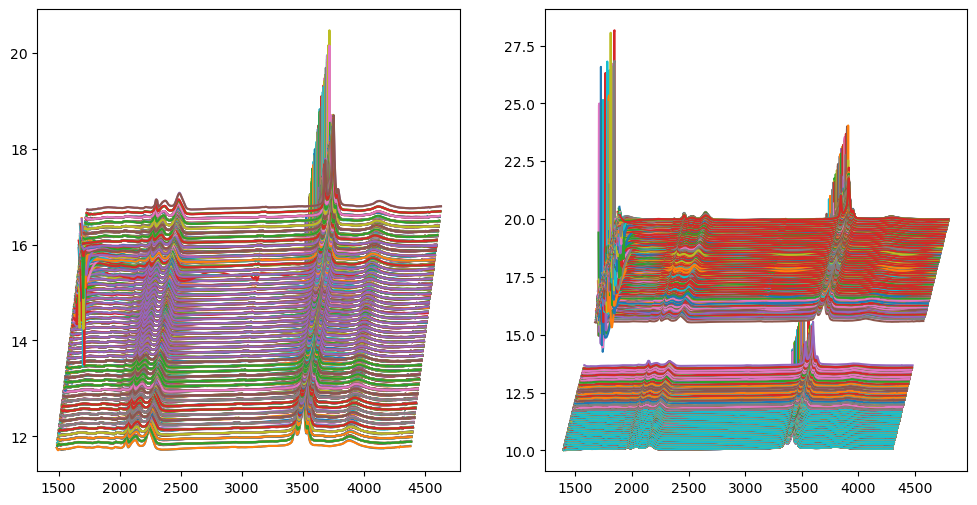

In [26]:
min_row, max_row = 100, 200
min_col, max_col = 100, 200
n_rows = min(G13_FTIR.shape[0], max_row)
n_cols = min(G13_FTIR.shape[1], max_col)
plt.figure(figsize = (12, 12))
#
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
for row in range(min_row, n_rows):
    for col in range(min_col, n_cols):
        if G13_mask[row, col]:
            ax[0].plot(wavenumbers + 5*row, G13_FTIR[row, col, :] + 0.1*row)
        else:
            ax[1].plot(wavenumbers + 5*row, G13_FTIR[row, col, :] + 0.1*row)    
        #
    #
plt.show()

## Showing data as scatter plots 

Masked and unmasked pictures of A12.

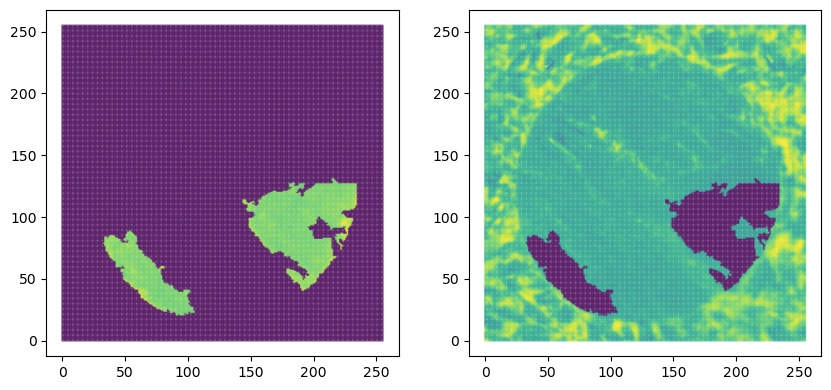

In [27]:
n_im_rows = A12_FTIR.shape[0]
n_im_cols = A12_FTIR.shape[1]
row_pix, col_pix = np.meshgrid(np.linspace(0, n_im_rows - 1, n_im_rows), 
                               np.linspace(0, n_im_cols - 1, n_im_cols), indexing = 'xy')
#
k_plot = 534
fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))
ax[0].scatter(row_pix, col_pix, c = A12_FTIR[:, :, k_plot]*(A12_mask), s = 0.1)
ax[1].scatter(row_pix, col_pix, c = A12_FTIR[:, :, k_plot]*np.logical_not(A12_mask), s = 0.1)
plt.show()

Masked and unmasked pictures of G13.

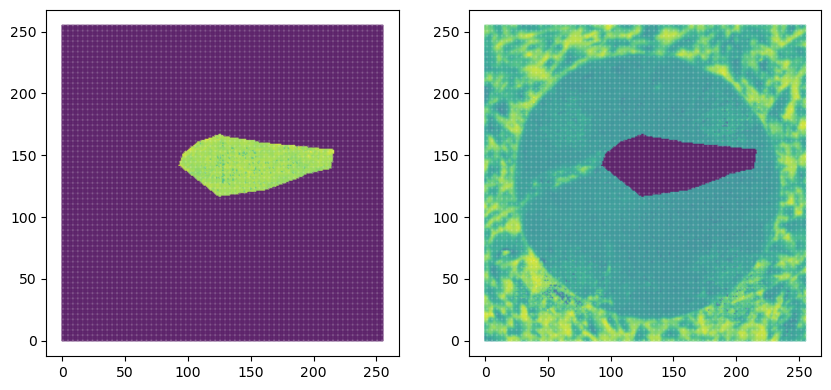

In [28]:
n_im_rows = G13_FTIR.shape[0]
n_im_cols = G13_FTIR.shape[1]
row_pix, col_pix = np.meshgrid(np.linspace(0, n_im_rows - 1, n_im_rows), 
                               np.linspace(0, n_im_cols - 1, n_im_cols), indexing = 'xy')
#
k_plot = 534
fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))
ax[0].scatter(row_pix, col_pix, c = G13_FTIR[:, :, k_plot]*(G13_mask), s = 0.1)
ax[1].scatter(row_pix, col_pix, c = G13_FTIR[:, :, k_plot]*np.logical_not(G13_mask), s = 0.1)
plt.show()

Scatter plots of masks, expanded masks, contracted masks, for A12.

A12 size 6208
A12 expansion 8074
A12 expanded size 14282
A12 contraction 5670
A12 contracted size 538


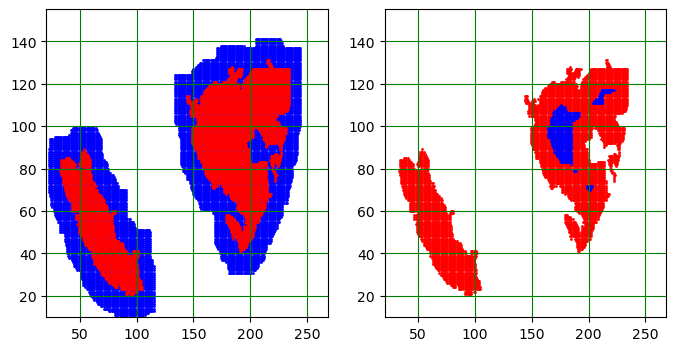

In [29]:
A12_mask_exp, expansion = expander(A12_mask, 10)
A12_mask_con, contraction = contracter(A12_mask, 10)
#
print("A12 size",np.sum(A12_mask))
print("A12 expansion",np.sum(expansion))
print("A12 expanded size",np.sum(A12_mask_exp))
print("A12 contraction",np.sum(contraction))
print("A12 contracted size",np.sum(A12_mask_con))
#
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
ax[0].scatter(row_pix[A12_mask_exp], col_pix[A12_mask_exp], c = 'b', s = 1.0)
ax[0].scatter(row_pix[A12_mask], col_pix[A12_mask], c = 'r', s = 1.0)
ax[0].set_xlim(0.9*np.amin(row_pix[A12_mask_exp]), 1.1*np.amax(row_pix[A12_mask_exp]))
ax[0].set_ylim(0.9*np.amin(col_pix[A12_mask_exp]), 1.1*np.amax(col_pix[A12_mask_exp]))
ax[0].grid(color = 'g')
#
ax[1].scatter(row_pix[A12_mask], col_pix[A12_mask], c = 'r', s = 1.0)
ax[1].scatter(row_pix[A12_mask_con], col_pix[A12_mask_con], c = 'b', s = 1.0)
ax[1].set_xlim(0.9*np.amin(row_pix[A12_mask_exp]), 1.1*np.amax(row_pix[A12_mask_exp]))
ax[1].set_ylim(0.9*np.amin(col_pix[A12_mask_exp]), 1.1*np.amax(col_pix[A12_mask_exp]))
ax[1].grid(color = 'g')
#
plt.show()

Scatter plots of masks, expanded masks, contracted masks, for G13.

G13 size 3991
G13 expansion 3900
G13 expanded size 7891
G13 contraction 2908
G13 contracted size 1083


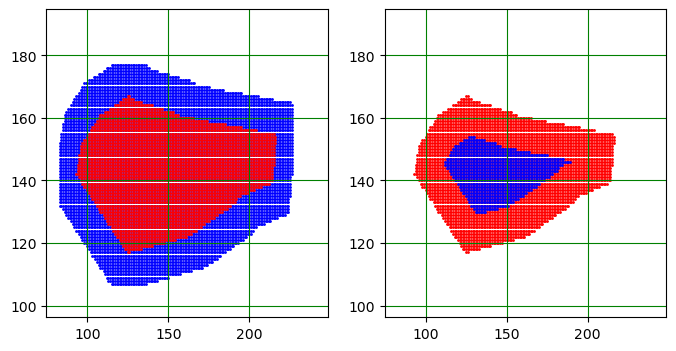

In [30]:
G13_mask_exp, expansion = expander(G13_mask, 10)
G13_mask_con, contraction = contracter(G13_mask, 10)
#
print("G13 size",np.sum(G13_mask))
print("G13 expansion",np.sum(expansion))
print("G13 expanded size",np.sum(G13_mask_exp))
print("G13 contraction",np.sum(contraction))
print("G13 contracted size",np.sum(G13_mask_con))
#
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
ax[0].scatter(row_pix[G13_mask_exp], col_pix[G13_mask_exp], c = 'b', s = 1.0)
ax[0].scatter(row_pix[G13_mask], col_pix[G13_mask], c = 'r', s = 1.0)
ax[0].set_xlim(0.9*np.amin(row_pix[G13_mask_exp]), 1.1*np.amax(row_pix[G13_mask_exp]))
ax[0].set_ylim(0.9*np.amin(col_pix[G13_mask_exp]), 1.1*np.amax(col_pix[G13_mask_exp]))
ax[0].grid(color = 'g')
#               
ax[1].scatter(row_pix[G13_mask], col_pix[G13_mask], c = 'r', s = 1.0)
ax[1].scatter(row_pix[G13_mask_con], col_pix[G13_mask_con], c = 'b', s = 1.0)
ax[1].set_xlim(0.9*np.amin(row_pix[G13_mask_exp]), 1.1*np.amax(row_pix[G13_mask_exp]))
ax[1].set_ylim(0.9*np.amin(col_pix[G13_mask_exp]), 1.1*np.amax(col_pix[G13_mask_exp]))
ax[1].grid(color = 'g')
#
plt.show()

## Masked and unmasked spectra

Look at average masked and unmasked spectra for A12 and G13.

 
Number of ks 753
Num A12 mask 6208. Num A12 unmask 59328
Num G13 mask 3991. Num G13 unmask 61545


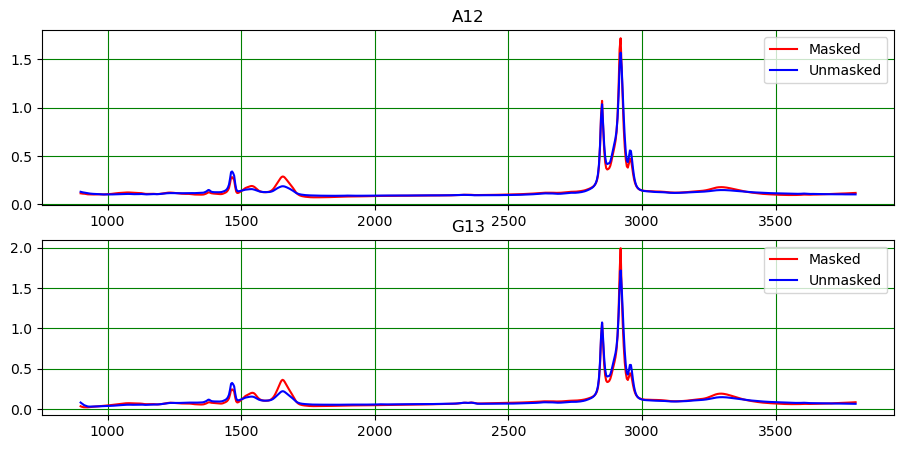

In [31]:
min_row, max_row = 0, 300
min_col, max_col = 0, 300
n_rows = min(A12_FTIR.shape[0], max_row)
n_cols = min(A12_FTIR.shape[1], max_col)
#
n_ks = len(wavenumbers)
print(" ")
print("Number of ks",n_ks)
A12_n_mask = 0
A12_n_unmask = 0
A12_avg_spect_mask = np.zeros((2, n_ks))
A12_avg_spect_unmask = np.zeros((2, n_ks))
#
for row in range(min_row, n_rows):
    for col in range(min_col, n_cols):
        if A12_mask[row, col]:
            A12_n_mask += 1
            A12_avg_spect_mask[0, :] += A12_FTIR[row, col, :]
            A12_avg_spect_mask[1, :] += A12_FTIR[row, col, :]**2
        else:
            A12_n_unmask += 1
            A12_avg_spect_unmask[0, :] += A12_FTIR[row, col, :]
            A12_avg_spect_mask[1, :] += A12_FTIR[row, col, :]**2
        #
    #
print("Num A12 mask",A12_n_mask,"\b. Num A12 unmask",A12_n_unmask)
A12_avg_spect_mask[0, :] = A12_avg_spect_mask[0,:]/A12_n_mask
A12_avg_spect_mask[1, :] = np.sqrt(A12_avg_spect_mask[1,:])/A12_n_mask
A12_avg_spect_unmask[0, :] = A12_avg_spect_unmask[0, :]/A12_n_unmask
A12_avg_spect_unmask[1, :] = np.sqrt(A12_avg_spect_unmask[1, :])/A12_n_unmask
#
G13_n_mask = 0
G13_n_unmask = 0
G13_avg_spect_mask = np.zeros((2, n_ks))
G13_avg_spect_unmask = np.zeros((2, n_ks))
#
for row in range(min_row, n_rows):
    for col in range(min_col, n_cols):
        if G13_mask[row, col]:
            G13_n_mask += 1
            G13_avg_spect_mask[0, :] += G13_FTIR[row, col, :]
            G13_avg_spect_mask[1, :] += G13_FTIR[row, col, :]**2
        else:
            G13_n_unmask += 1
            G13_avg_spect_unmask[0, :] += G13_FTIR[row, col, :]
            G13_avg_spect_mask[1, :] += G13_FTIR[row, col, :]**2
        #
    #
print("Num G13 mask",G13_n_mask,"\b. Num G13 unmask",G13_n_unmask)
G13_avg_spect_mask[0, :] = G13_avg_spect_mask[0,:]/G13_n_mask
G13_avg_spect_mask[1, :] = np.sqrt(G13_avg_spect_mask[1,:])/G13_n_mask
G13_avg_spect_unmask[0, :] = G13_avg_spect_unmask[0, :]/G13_n_unmask
G13_avg_spect_unmask[1, :] = np.sqrt(G13_avg_spect_unmask[1, :])/G13_n_unmask
#
fig, ax = plt.subplots(2, 1, figsize = (11, 5))
#
ax[0].set_title("A12")
#ax[0].errorbar(wavenumbers, A12_avg_spect_mask[0, :], yerr = A12_avg_spect_mask[1, :], 
#                    marker = '+', linestyle = '', color = 'r', label = 'Masked')
#ax[0].errorbar(wavenumbers, A12_avg_spect_unmask[0, :], yerr = A12_avg_spect_unmask[1, :], 
#                     marker = '+', linestyle = '', color = 'b', label = 'Unasked')
ax[0].plot(wavenumbers, A12_avg_spect_mask[0, :],  
           marker = '', linestyle = '-', color = 'r', label = 'Masked')
ax[0].plot(wavenumbers, A12_avg_spect_unmask[0, :],  
           marker = '', linestyle = '-', color = 'b', label = 'Unmasked')
ax[0].grid(color = 'g')
ax[0].legend()
#
ax[1].set_title("G13")
#ax[1].errorbar(wavenumbers, G13_avg_spect_mask[0, :], yerr = G13_avg_spect_mask[1, :], 
#                    marker = '+', linestyle = '', color = 'r', label = 'Masked')
#ax[1].errorbar(wavenumbers, G13_avg_spect_unmask[0, :], yerr = G13_avg_spect_unmask[1, :], 
#                     marker = '+', linestyle = '', color = 'b', label = 'Unmasked')
ax[1].plot(wavenumbers, G13_avg_spect_mask[0, :], 
           marker = '', linestyle = '-', color = 'r', label = 'Masked')
ax[1].plot(wavenumbers, G13_avg_spect_unmask[0, :],  
           marker = '', linestyle = '-', color = 'b', label = 'Unmasked')
ax[1].grid(color = 'g')
ax[1].legend()
#
plt.show()

There appear to be some differences. Is this due to inclusion of "off image" data in unmasked spectra? Need to define an overall image mask to remove these data. Box height and width is 256 pixels. Central image has diameter approximately $256 - $2\times25 = 206$ pixels or radius 103 pixels. Image mask is therefore approximately circle centred on pixel (125, 125) with radius 103 pixels (allowing for Python pixel indexing!).

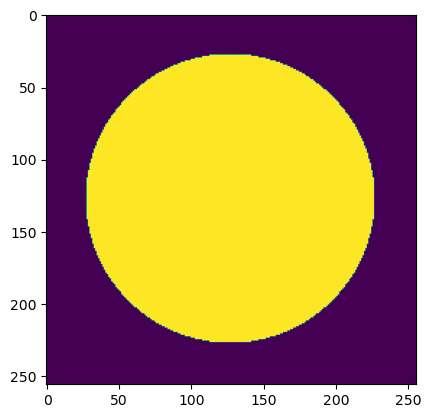

In [32]:
im_rows = 256
im_cols = 256
im_cent_row = 256/2 - 1
im_cent_col = 256/2 - 1
im_rad = 100
#
cols_here = np.linspace(0, im_cols - 1, im_cols)
#
im_mask = np.zeros((im_rows, im_cols)).astype(bool)
for r in range(0, im_rows):
    im_mask[r, :] = np.sqrt((r - im_cent_row)**2 + (cols_here[:] - im_cent_row)**2) < im_rad
imgplot = plt.imshow(im_mask, cmap = 'viridis')

Look at images using this mask.

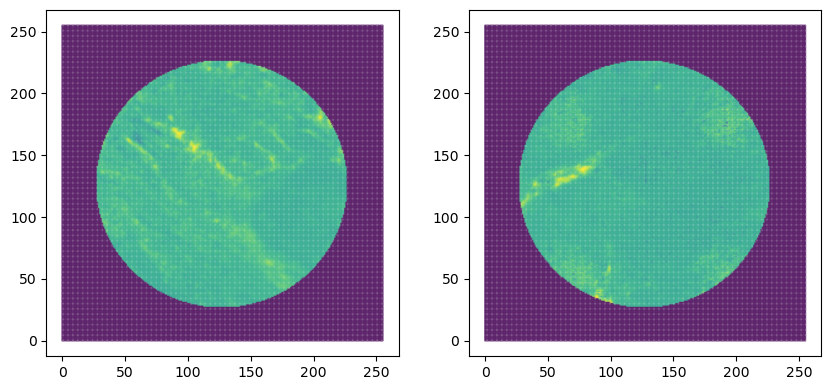

In [33]:
k_plot = 534
fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))
ax[0].scatter(row_pix, col_pix, c = A12_FTIR[:, :, k_plot]*im_mask, s = 0.1)
ax[1].scatter(row_pix, col_pix, c = G13_FTIR[:, :, k_plot]*im_mask, s = 0.1)
plt.show()

Now look at mean spectra again!

 
Number of ks 753
Num A12 mask 4698. Num A12 unmask 26699. Total 31397
Num G13 mask 3991. Num G13 unmask 27406. Total 31397


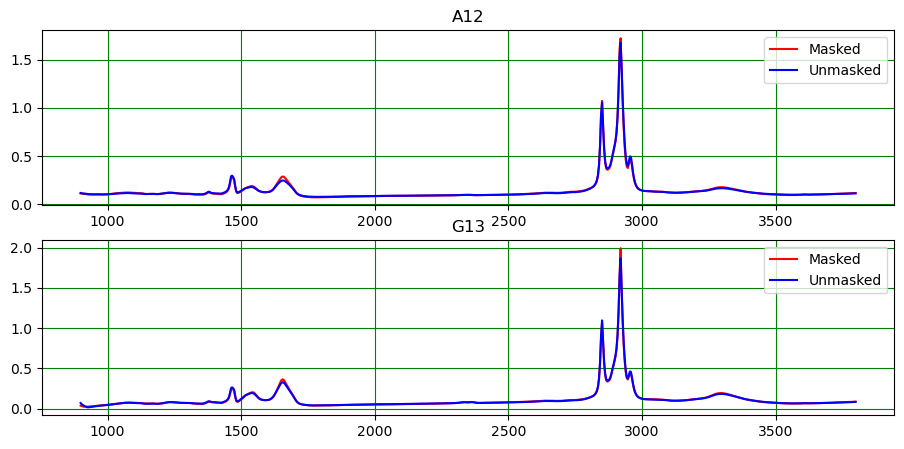

In [34]:
min_row, max_row = 0, 300
min_col, max_col = 0, 300
n_rows = min(A12_FTIR.shape[0], max_row)
n_cols = min(A12_FTIR.shape[1], max_col)
#
n_ks = len(wavenumbers)
print(" ")
print("Number of ks",n_ks)
A12_n_mask = 0
A12_n_unmask = 0
A12_avg_spect_mask = np.zeros((2, n_ks))
A12_avg_spect_unmask = np.zeros((2, n_ks))
#
for row in range(min_row, n_rows):
    for col in range(min_col, n_cols):
        if A12_mask[row, col]*im_mask[row, col]:
            A12_n_mask += 1
            A12_avg_spect_mask[0, :] += A12_FTIR[row, col, :]
            A12_avg_spect_mask[1, :] += A12_FTIR[row, col, :]**2
        elif im_mask[row, col]:
            A12_n_unmask += 1
            A12_avg_spect_unmask[0, :] += A12_FTIR[row, col, :]
            A12_avg_spect_mask[1, :] += A12_FTIR[row, col, :]**2
        #
    #
print("Num A12 mask",A12_n_mask,"\b. Num A12 unmask",A12_n_unmask,
      "\b. Total",A12_n_mask + A12_n_unmask)
A12_avg_spect_mask[0, :] = A12_avg_spect_mask[0,:]/A12_n_mask
A12_avg_spect_mask[1, :] = np.sqrt(A12_avg_spect_mask[1,:])/A12_n_mask
A12_avg_spect_unmask[0, :] = A12_avg_spect_unmask[0, :]/A12_n_unmask
A12_avg_spect_unmask[1, :] = np.sqrt(A12_avg_spect_unmask[1, :])/A12_n_unmask
#
G13_n_mask = 0
G13_n_unmask = 0
G13_avg_spect_mask = np.zeros((2, n_ks))
G13_avg_spect_unmask = np.zeros((2, n_ks))
#
for row in range(min_row, n_rows):
    for col in range(min_col, n_cols):
        if G13_mask[row, col]*im_mask[row, col]:
            G13_n_mask += 1
            G13_avg_spect_mask[0, :] += G13_FTIR[row, col, :]
            G13_avg_spect_mask[1, :] += G13_FTIR[row, col, :]**2
        elif im_mask[row, col]:
            G13_n_unmask += 1
            G13_avg_spect_unmask[0, :] += G13_FTIR[row, col, :]
            G13_avg_spect_mask[1, :] += G13_FTIR[row, col, :]**2
        #
    #
print("Num G13 mask",G13_n_mask,"\b. Num G13 unmask",G13_n_unmask,
      "\b. Total",G13_n_mask + G13_n_unmask)
G13_avg_spect_mask[0, :] = G13_avg_spect_mask[0,:]/G13_n_mask
G13_avg_spect_mask[1, :] = np.sqrt(G13_avg_spect_mask[1,:])/G13_n_mask
G13_avg_spect_unmask[0, :] = G13_avg_spect_unmask[0, :]/G13_n_unmask
G13_avg_spect_unmask[1, :] = np.sqrt(G13_avg_spect_unmask[1, :])/G13_n_unmask
#
fig, ax = plt.subplots(2, 1, figsize = (11, 5))
#
ax[0].set_title("A12")
#ax[0].errorbar(wavenumbers, A12_avg_spect_mask[0, :], yerr = A12_avg_spect_mask[1, :], 
#                    marker = '+', linestyle = '', color = 'r', label = 'Masked')
#ax[0].errorbar(wavenumbers, A12_avg_spect_unmask[0, :], yerr = A12_avg_spect_unmask[1, :], 
#                     marker = '+', linestyle = '', color = 'b', label = 'Unasked')
ax[0].plot(wavenumbers, A12_avg_spect_mask[0, :],  
           marker = '', linestyle = '-', color = 'r', label = 'Masked')
ax[0].plot(wavenumbers, A12_avg_spect_unmask[0, :],  
           marker = '', linestyle = '-', color = 'b', label = 'Unmasked')
ax[0].grid(color = 'g')
ax[0].legend()
#
ax[1].set_title("G13")
#ax[1].errorbar(wavenumbers, G13_avg_spect_mask[0, :], yerr = G13_avg_spect_mask[1, :], 
#                    marker = '+', linestyle = '', color = 'r', label = 'Masked')
#ax[1].errorbar(wavenumbers, G13_avg_spect_unmask[0, :], yerr = G13_avg_spect_unmask[1, :], 
#                     marker = '+', linestyle = '', color = 'b', label = 'Unmasked')
ax[1].plot(wavenumbers, G13_avg_spect_mask[0, :], 
           marker = '', linestyle = '-', color = 'r', label = 'Masked')
ax[1].plot(wavenumbers, G13_avg_spect_unmask[0, :],  
           marker = '', linestyle = '-', color = 'b', label = 'Unmasked')
ax[1].grid(color = 'g')
ax[1].legend()
#
plt.show()